## with experiment ros bag
### our controller 

Total Fuel Consumption over the period in liters/second: 0.22649534245981534
Average Fuel Consumption in litres per second: 0.0011324767122990768


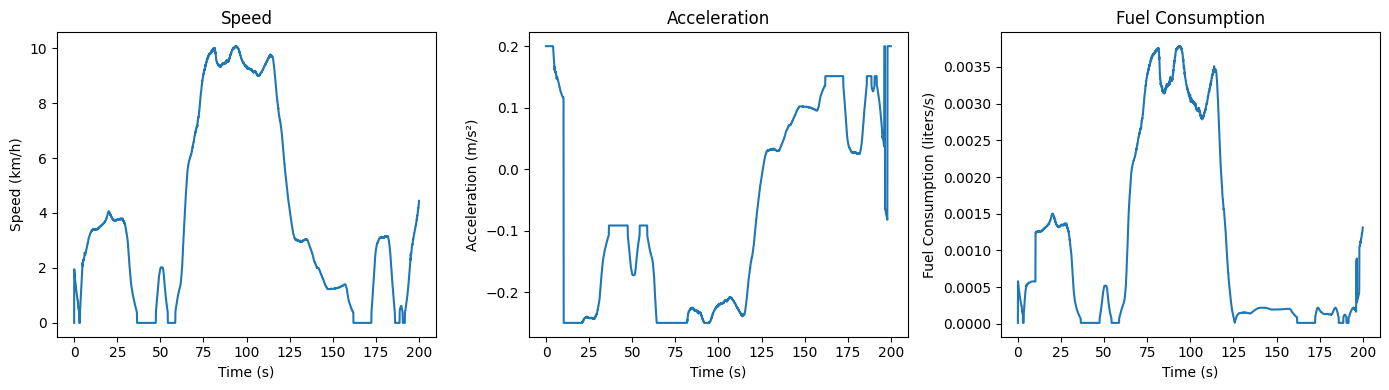

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/mmuk2/Downloads/DataCollected.xlsx'
df = pd.read_excel(file_path)
# Constants for R(t) calculation
rho = 1.2256  # air density in kg/m^3
Cd = 0.32  # vehicle drag coefficient as given or calculated based on the vehicle's dimensions
Ch = 1  # correction factor for altitude, 1 since H is 0 km
Af = 2.68  # frontal area of the vehicle in m^2 as provided
Cr = 0.01  # rolling resistance coefficient
C1 = 0.0328  # coefficient associated with rolling resistance
C2 = 4.575  # coefficient associated with rolling resistance
m = 1500  # vehicle mass in kg
eta_d = 0.90  # driveline efficiency
alpha0 = 1.335 * 10**-5
alpha1 = 0.003
alpha2 = 0.00008757

# Resistance function determined by drag and rolling resistance (friction) which is also added to our power.
df['R(t)'] = df.apply(lambda row: (rho / 25.92 * Cd * Ch * Af * row['vel_x1']**2) +
                                    (9.80066 * m / 1000 * Cr * (C1 * row['vel_x1'] + C2)), axis=1)

# Calculate P(t) using R(t)
df['P(t)1'] = (df['R(t)'] + m * 1.04 * abs(df['our_cmd_accel1']) * df['vel_x1']) / (3600 * eta_d)

df['FC(t)1'] = alpha0 + alpha1 * df['P(t)1'] + alpha2 * df['P(t)1']**2

df['time_interval1'] = df['Time1'].diff().fillna(0) 

df['Interval_FC1'] = df['FC(t)1'] * df['time_interval1']

total_fuel_consumption = df['Interval_FC1'].sum()

print("Total Fuel Consumption over the period in liters/second:", total_fuel_consumption)

# Calculate the total time covered in the dataset in seconds
total_time = df['time_interval1'].sum()

# Calculate the average fuel consumption per second
average_fuel_consumption_per_second = total_fuel_consumption / total_time

print("Average Fuel Consumption in litres per second:", average_fuel_consumption_per_second)

# Speed vs Time
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(df['Time1'], df['vel_x1'])
plt.title('Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (km/h)')

# Acceleration vs Time
plt.subplot(1, 3, 2)
plt.plot(df['Time1'], df['our_cmd_accel1'])
plt.title('Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')

# Fuel Consumption vs Time
plt.subplot(1, 3, 3)
plt.plot(df['Time1'], df['FC(t)1'])
plt.title('Fuel Consumption')
plt.xlabel('Time (s)')
plt.ylabel('Fuel Consumption (liters/s)')

plt.tight_layout()
plt.show()

### professor's controller

Fuel Consumption over the period in liters/second: 0.49240107143015155
Average Fuel Consumption in litres per second: 0.002462005357150758


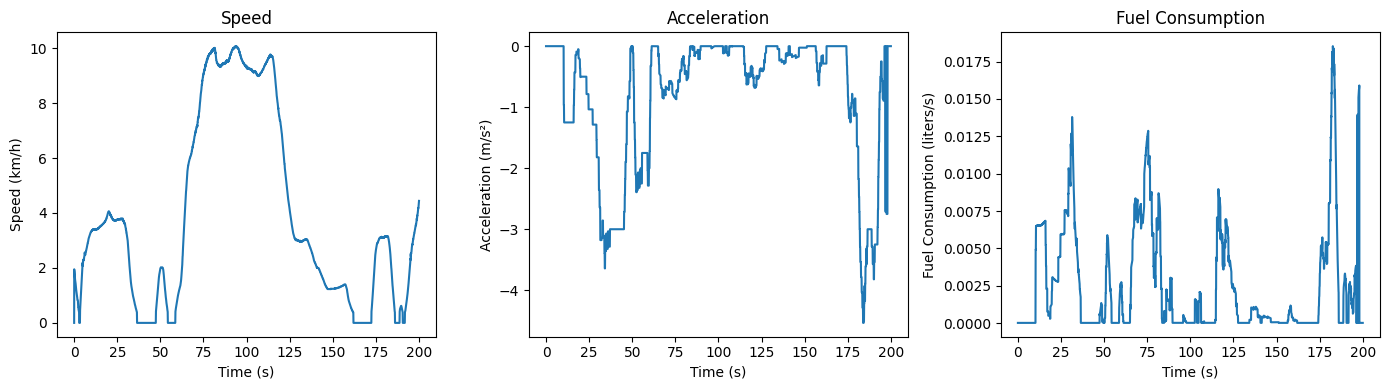

In [8]:

df['P(t)2'] = (df['R(t)'] + m * 1.04 * abs(df['ex_cmd_accel1']) * df['vel_x1']) / (3600 * eta_d)

df['FC(t)2'] = alpha0 + alpha1 * df['P(t)2'] + alpha2 * df['P(t)2']**2

df['time_interval2'] = df['Time1'].diff().fillna(0)

df['Interval_FC2'] = df['FC(t)2'] * df['time_interval2']

total_fuel_consumption = df['Interval_FC2'].sum()

# output_path = '/Users/geqinwen/Desktop/cal.xlsx'
# df.to_excel(output_path, index=False)

print("Fuel Consumption over the period in liters/second:", total_fuel_consumption)
# Calculate the total time covered in the dataset in seconds
total_time = df['time_interval1'].sum()

# Calculate the average fuel consumption per second
average_fuel_consumption_per_second = total_fuel_consumption / total_time

print("Average Fuel Consumption in litres per second:", average_fuel_consumption_per_second)
# Speed vs Time
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(df['Time1'], df['vel_x1'])
plt.title('Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (km/h)')

# Acceleration vs Time
plt.subplot(1, 3, 2)
plt.plot(df['Time1'], df['ex_cmd_accel1'])
plt.title('Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')

# Fuel Consumption vs Time
plt.subplot(1, 3, 3)
plt.plot(df['Time1'], df['FC(t)2'])
plt.title('Fuel Consumption')
plt.xlabel('Time (s)')
plt.ylabel('Fuel Consumption (liters/s)')

plt.tight_layout()
plt.show()

## with original ros bag

Total Fuel Consumption over the period: 0.3212679336524454
Average Fuel Consumption in litres per second: 0.002462005357150758


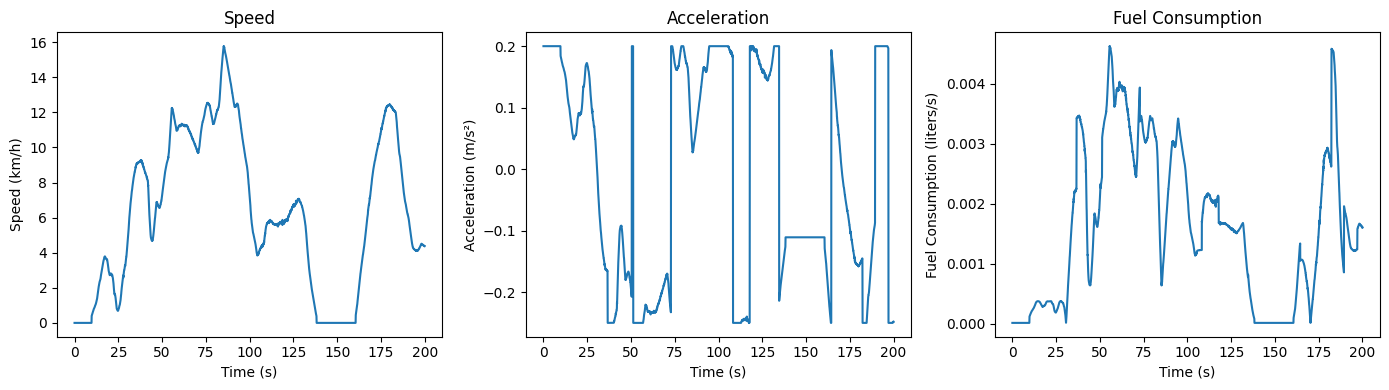

In [9]:
df['P(t)3'] = (m * 1.04 * abs(df['our_cmd_accel2']) * df['vel_x2']) / (3600 * eta_d)

df['FC(t)3'] = alpha0 + alpha1 * df['P(t)3'] + alpha2 * df['P(t)3']**2

df['time_interval3'] = df['Time2'].diff().fillna(0) 

df['Interval_FC3'] = df['FC(t)3'] * df['time_interval3']

total_fuel_consumption = df['Interval_FC3'].sum()

output_path = '/Users/geqinwen/Desktop/cal.xlsx'  
# df.to_excel(output_path, index=False)

print("Total Fuel Consumption over the period:", total_fuel_consumption)

print("Average Fuel Consumption in litres per second:", average_fuel_consumption_per_second)
# Speed vs Time
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(df['Time1'], df['vel_x2'])
plt.title('Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (km/h)')

# Acceleration vs Time
plt.subplot(1, 3, 2)
plt.plot(df['Time1'], df['our_cmd_accel2'])
plt.title('Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')

# Fuel Consumption vs Time
plt.subplot(1, 3, 3)
plt.plot(df['Time1'], df['FC(t)3'])
plt.title('Fuel Consumption')
plt.xlabel('Time (s)')
plt.ylabel('Fuel Consumption (liters/s)')

plt.tight_layout()
plt.show()